<a href="https://colab.research.google.com/github/tilakparth/Data_Science/blob/master/neural%20network/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Model parameters
input_size = 2 # no_of_features
layers = [4,3] #no of neurons in 1st and 2nd layers
output_size = 2

In [3]:
def softmax(a):
    a = np.exp(a)
    a = a/np.sum(a,axis=1,keepdims=True)
    return a

### Preparing our model

In [4]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        #Creationg Neural Network Architecture
        model = {} ##Dictionary
        #First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        #Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        #Third/Output layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        self.model = model
        self.activation_outputs =None
    def forward(self,x): ## Forward prop
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) +b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_hat = softmax(z3)
        self.activation_outputs = (a1,a2,y_hat)
        return y_hat
    def backward(self,x,y,learning_rate = 0.001): ## Backward prop 
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_hat = self.activation_outputs
        m = x.shape[0]
        
#         y_hat = forward(x)
        delta3 = y_hat - y;
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Update the Model Parameters using Gradient Descent
        self.model['W1'] -= dw1*learning_rate
        self.model['W2'] -= dw2*learning_rate
        self.model['W3'] -= dw3*learning_rate
        
        self.model['b1'] -= db1*learning_rate
        self.model['b2'] -= db2*learning_rate
        self.model['b3'] -= db3*learning_rate
        return 
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_hat = self.activation_outputs
        print("W1", W1.shape)
        print("A1", a1.shape)
        
        print("W2", W2.shape)
        print("A2", a2.shape)
        
        print("W3", W3.shape)
        print("Y_hat", y_hat.shape)
        return 

In [5]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):   ## converting the  output in oht matrix
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

#### Preparing Dataset

In [6]:
from sklearn.datasets import make_circles

In [7]:
X,Y = make_circles(n_samples=500,shuffle=True,noise=0.08,random_state=1,factor=0.6)

[]

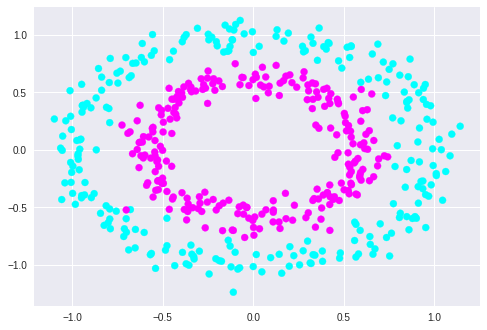

In [8]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.cool)
plt.plot()

### Training our model

In [9]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [10]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss =[]
    classes = 2
    Y_OHT = one_hot(Y,classes)
    for ix in range(epochs):
        
        Y_hat = model.forward(X)
        l = loss(Y_OHT,Y_hat)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [11]:
training_loss =train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3585
Epoch 1 Loss 0.3330
Epoch 2 Loss 0.3248
Epoch 3 Loss 0.3173
Epoch 4 Loss 0.3100
Epoch 5 Loss 0.3026
Epoch 6 Loss 0.2950
Epoch 7 Loss 0.2871
Epoch 8 Loss 0.2791
Epoch 9 Loss 0.2709
Epoch 10 Loss 0.2626
Epoch 11 Loss 0.2544
Epoch 12 Loss 0.2463
Epoch 13 Loss 0.2384
Epoch 14 Loss 0.2308
Epoch 15 Loss 0.2235
Epoch 16 Loss 0.2166
Epoch 17 Loss 0.2101
Epoch 18 Loss 0.2038
Epoch 19 Loss 0.1979
Epoch 20 Loss 0.1923
Epoch 21 Loss 0.1869
Epoch 22 Loss 0.1817
Epoch 23 Loss 0.1769
Epoch 24 Loss 0.1723
Epoch 25 Loss 0.1683
Epoch 26 Loss 0.1654
Epoch 27 Loss 0.1646
Epoch 28 Loss 0.1684
Epoch 29 Loss 0.1804
Epoch 30 Loss 0.2027
Epoch 31 Loss 0.2155
Epoch 32 Loss 0.2307
Epoch 33 Loss 0.1994
Epoch 34 Loss 0.2026
Epoch 35 Loss 0.1789
Epoch 36 Loss 0.1775
Epoch 37 Loss 0.1642
Epoch 38 Loss 0.1625
Epoch 39 Loss 0.1542
Epoch 40 Loss 0.1528
Epoch 41 Loss 0.1469
Epoch 42 Loss 0.1456
Epoch 43 Loss 0.1410
Epoch 44 Loss 0.1397
Epoch 45 Loss 0.1357
Epoch 46 Loss 0.1342
Epoch 47 Loss 0.1306
Ep

[]

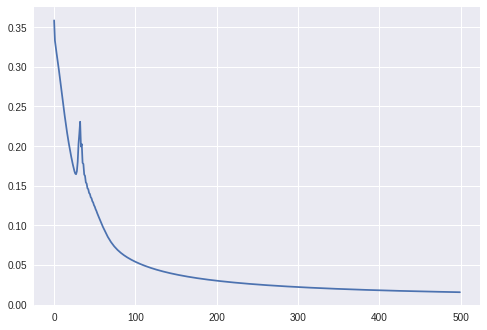

In [12]:
plt.plot(training_loss)
plt.plot()

In [13]:
model.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_hat (500, 2)


In [14]:
pred =model.predict(X)
# model.backward

[]

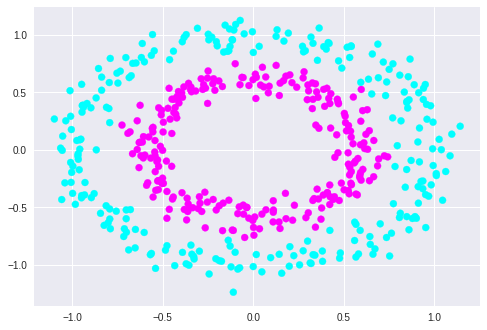

In [15]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=pred,cmap=plt.cm.cool)
plt.plot()

In [17]:
## Find Accuracy
from visualize import plot_decision_boundary

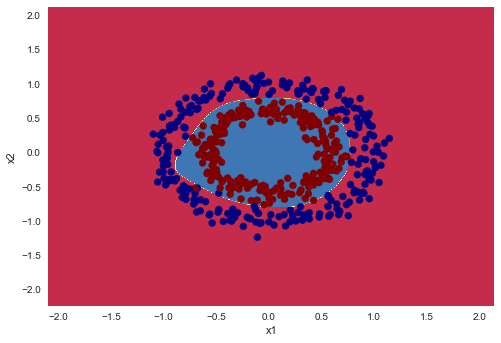

In [ ]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [ ]:
outputs = model.predict(X)

In [ ]:
(np.sum(outputs == Y)/Y.shape[0])*100

99.2

### XOR dataset

In [ ]:
X = np.array([[0,0],[1,1],[1,0],[0,1]])
Y = np.array([0,0,1,1])

In [ ]:
losses = train(X,Y,model,1000,0.1)

Epoch 0 Loss 0.0537
Epoch 1 Loss 0.0497
Epoch 2 Loss 0.0463
Epoch 3 Loss 0.0432
Epoch 4 Loss 0.0405
Epoch 5 Loss 0.0381
Epoch 6 Loss 0.0359
Epoch 7 Loss 0.0340
Epoch 8 Loss 0.0322
Epoch 9 Loss 0.0306
Epoch 10 Loss 0.0292
Epoch 11 Loss 0.0278
Epoch 12 Loss 0.0266
Epoch 13 Loss 0.0255
Epoch 14 Loss 0.0244
Epoch 15 Loss 0.0235
Epoch 16 Loss 0.0226
Epoch 17 Loss 0.0218
Epoch 18 Loss 0.0210
Epoch 19 Loss 0.0203
Epoch 20 Loss 0.0196
Epoch 21 Loss 0.0189
Epoch 22 Loss 0.0183
Epoch 23 Loss 0.0178
Epoch 24 Loss 0.0172
Epoch 25 Loss 0.0167
Epoch 26 Loss 0.0163
Epoch 27 Loss 0.0158
Epoch 28 Loss 0.0154
Epoch 29 Loss 0.0150
Epoch 30 Loss 0.0146
Epoch 31 Loss 0.0142
Epoch 32 Loss 0.0139
Epoch 33 Loss 0.0136
Epoch 34 Loss 0.0132
Epoch 35 Loss 0.0129
Epoch 36 Loss 0.0126
Epoch 37 Loss 0.0124
Epoch 38 Loss 0.0121
Epoch 39 Loss 0.0118
Epoch 40 Loss 0.0116
Epoch 41 Loss 0.0114
Epoch 42 Loss 0.0111
Epoch 43 Loss 0.0109
Epoch 44 Loss 0.0107
Epoch 45 Loss 0.0105
Epoch 46 Loss 0.0103
Epoch 47 Loss 0.0101
Ep

Epoch 516 Loss 0.0009
Epoch 517 Loss 0.0009
Epoch 518 Loss 0.0009
Epoch 519 Loss 0.0009
Epoch 520 Loss 0.0009
Epoch 521 Loss 0.0008
Epoch 522 Loss 0.0008
Epoch 523 Loss 0.0008
Epoch 524 Loss 0.0008
Epoch 525 Loss 0.0008
Epoch 526 Loss 0.0008
Epoch 527 Loss 0.0008
Epoch 528 Loss 0.0008
Epoch 529 Loss 0.0008
Epoch 530 Loss 0.0008
Epoch 531 Loss 0.0008
Epoch 532 Loss 0.0008
Epoch 533 Loss 0.0008
Epoch 534 Loss 0.0008
Epoch 535 Loss 0.0008
Epoch 536 Loss 0.0008
Epoch 537 Loss 0.0008
Epoch 538 Loss 0.0008
Epoch 539 Loss 0.0008
Epoch 540 Loss 0.0008
Epoch 541 Loss 0.0008
Epoch 542 Loss 0.0008
Epoch 543 Loss 0.0008
Epoch 544 Loss 0.0008
Epoch 545 Loss 0.0008
Epoch 546 Loss 0.0008
Epoch 547 Loss 0.0008
Epoch 548 Loss 0.0008
Epoch 549 Loss 0.0008
Epoch 550 Loss 0.0008
Epoch 551 Loss 0.0008
Epoch 552 Loss 0.0008
Epoch 553 Loss 0.0008
Epoch 554 Loss 0.0008
Epoch 555 Loss 0.0008
Epoch 556 Loss 0.0008
Epoch 557 Loss 0.0008
Epoch 558 Loss 0.0008
Epoch 559 Loss 0.0008
Epoch 560 Loss 0.0008
Epoch 561 

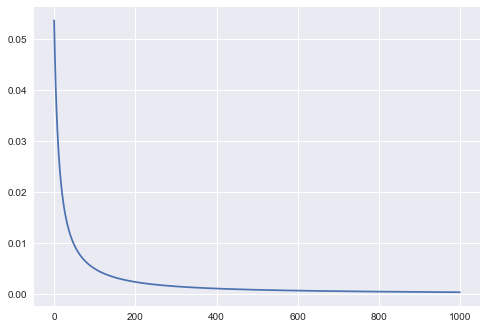

In [ ]:
plt.plot(losses)

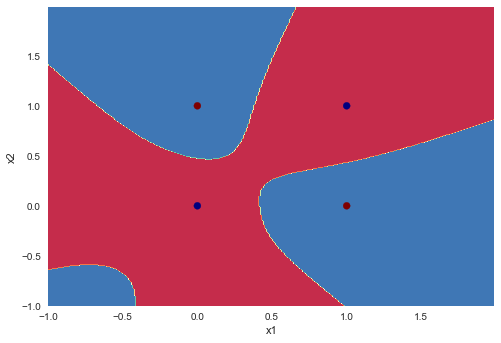

In [ ]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## Other Datasets

In [ ]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [ ]:
def load_dataset(dataset):
    if dataset == "moons":
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset == "circles":
        X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset == "classification":
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        X = np.array([[0,0],[1,1],[1,0],[0,1]])
        Y = np.array([0,0,1,1])
    return X,Y    

Training acc 100.0000


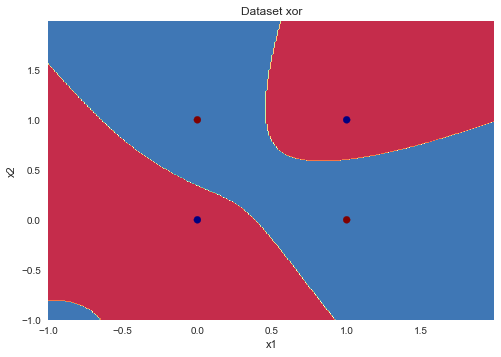

Training acc 97.8000


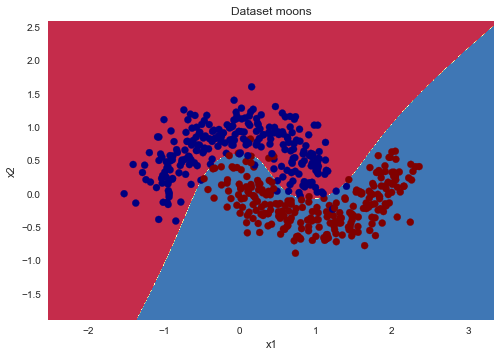

Training acc 97.0000


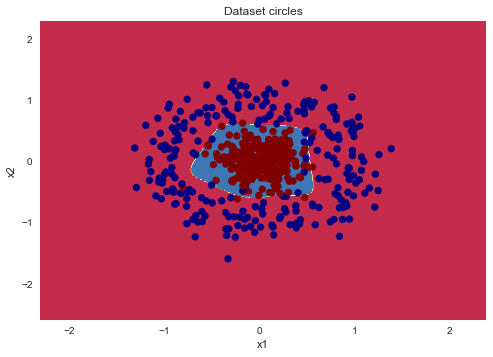

Training acc 96.2000


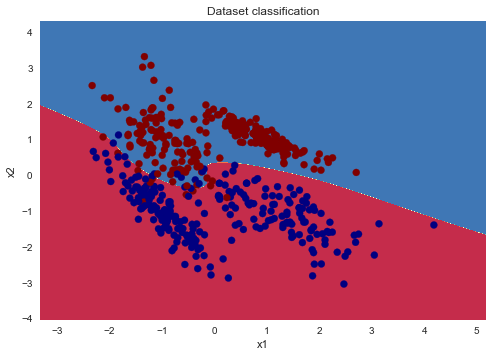

In [ ]:
datasets = ["xor","moons","circles","classification"]
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    print("Training acc %.4f"%(acc*100))
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()